In [1]:
suppressMessages(source("../config_sing.R"))

You are in singularity_proj_encode_fcc 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_encode_fcc 


In [2]:
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")
dir(fdiry)

[1] "KS91_K562_hg38_ASTARRseq_Input_rep1.GATA1.unstranded.dedups.perbase.tsv.gz"
 [2] "KS91_K562_hg38_ASTARRseq_Input_rep2.GATA1.unstranded.dedups.perbase.tsv.gz"
 [3] "KS91_K562_hg38_ASTARRseq_Input_rep3.GATA1.unstranded.dedups.perbase.tsv.gz"
 [4] "KS91_K562_hg38_ASTARRseq_Input_rep4.GATA1.unstranded.dedups.perbase.tsv.gz"
 [5] "KS91_K562_hg38_ASTARRseq_Input_rep5.GATA1.unstranded.dedups.perbase.tsv.gz"
 [6] "KS91_K562_hg38_ASTARRseq_Input_rep6.GATA1.unstranded.dedups.perbase.tsv.gz"
 [7] "KS91_K562_hg38_ASTARRseq_Output_rep1.GATA1.unstranded.perbase.tsv.gz"      
 [8] "KS91_K562_hg38_ASTARRseq_Output_rep2.GATA1.unstranded.perbase.tsv.gz"      
 [9] "KS91_K562_hg38_ASTARRseq_Output_rep3.GATA1.unstranded.perbase.tsv.gz"      
[10] "KS91_K562_hg38_ASTARRseq_Output_rep4.GATA1.unstranded.perbase.tsv.gz"      
[11] "region_GATA1.bed"

In [4]:
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")
sam   = paste("Input", "rep1", sep="_")
fglob = paste0("*", sam, "*")

Sys.glob(file.path(fdiry, fglob))

[1] "/mount/work/out/proj_encode_fcc/KS91_K562_ASTARRseq/coverage/KS91_K562_hg38_ASTARRseq_Input_rep1.GATA1.unstranded.dedups.perbase.tsv.gz"

In [5]:
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "fragment")
fname = "library_size.tsv"
dat_lib = read_tsv(file.path(fdiry, fname))
head(dat_lib)

Rows: 10 Columns: 4
── Column specification ──────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Sample, Group, Replicate
dbl (1): Size

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sample,Group,Replicate,Size
<chr>,<chr>,<chr>,<dbl>
Input_rep1,Input,rep1,358823
Input_rep2,Input,rep2,461577
Input_rep3,Input,rep3,496229
Input_rep4,Input,rep4,464845
Input_rep5,Input,rep5,454013
Input_rep6,Input,rep6,409058


In [6]:
### init: file directory
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")

### init:
ctypes = c(col_character(), col_integer(), col_integer())
cnames = c("Chrom", "Loc", "Depth")

### INPUT: set sample group and number of replicates
GROUP   = "Input"
REPLICS = paste0("rep", 1:6)

### INPUT: import data
lst_dat_inp = lapply(REPLICS, function(replic){
    ### get sample file path
    sam   = paste(GROUP, replic, sep="_")
    fglob = paste0("*", sam, "*")
    fpath = Sys.glob(file.path(fdiry, fglob))
    
    ### read data
    dat = read_tsv(
        fpath, 
        col_types = ctypes, 
        col_names = cnames)
    dat$Sample = sam
    return(dat)
})

### OUTPUT: set sample group and number of replicates
GROUP   = "Output"
REPLICS = paste0("rep", 1:4)

### OUTPUT: import data
lst_dat_out = lapply(REPLICS, function(replic){
    ### get sample file path
    sam   = paste(GROUP, replic, sep="_")
    fglob = paste0("*", sam, "*")
    fpath = Sys.glob(file.path(fdiry, fglob))
    
    ### read data
    dat = read_tsv(
        fpath, 
        col_types = ctypes, 
        col_names = cnames)
    dat$Sample = sam
    return(dat)
})

In [8]:
dat_astarr = bind_rows(lst_dat_inp, lst_dat_out) %>% 
    left_join(dat_lib, by="Sample") %>%
    mutate(Depth_Norm = Depth / Size)
head(dat_astarr)

Chrom,Loc,Depth,Sample,Group,Replicate,Size,Depth_Norm
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
chrX,47786400,0,Input_rep1,Input,rep1,358823,0
chrX,47786401,0,Input_rep1,Input,rep1,358823,0
chrX,47786402,0,Input_rep1,Input,rep1,358823,0
chrX,47786403,0,Input_rep1,Input,rep1,358823,0
chrX,47786404,0,Input_rep1,Input,rep1,358823,0
chrX,47786405,0,Input_rep1,Input,rep1,358823,0


In [11]:
dat    = dat_astarr
n_rows = nrow(dat)
n_pick = 100

idx = rep(1:n_pick, n_rows / n_pick + 1)
idx = idx[1:n_rows]
idx = (idx == 1)

dat = dat[idx,]
head(dat)

Chrom,Loc,Depth,Sample,Group,Replicate,Size,Depth_Norm
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
chrX,47786400,0,Input_rep1,Input,rep1,358823,0
chrX,47786500,0,Input_rep1,Input,rep1,358823,0
chrX,47786600,0,Input_rep1,Input,rep1,358823,0
chrX,47786700,0,Input_rep1,Input,rep1,358823,0
chrX,47786800,0,Input_rep1,Input,rep1,358823,0
chrX,47786900,0,Input_rep1,Input,rep1,358823,0


In [12]:
gpt = ggplot(dat, aes(x=Loc, y=Depth, color=Sample, group=Sample)) + 
    geom_line(size=0.05) + 
    geom_point(size=0.1) + 
    theme_cowplot()

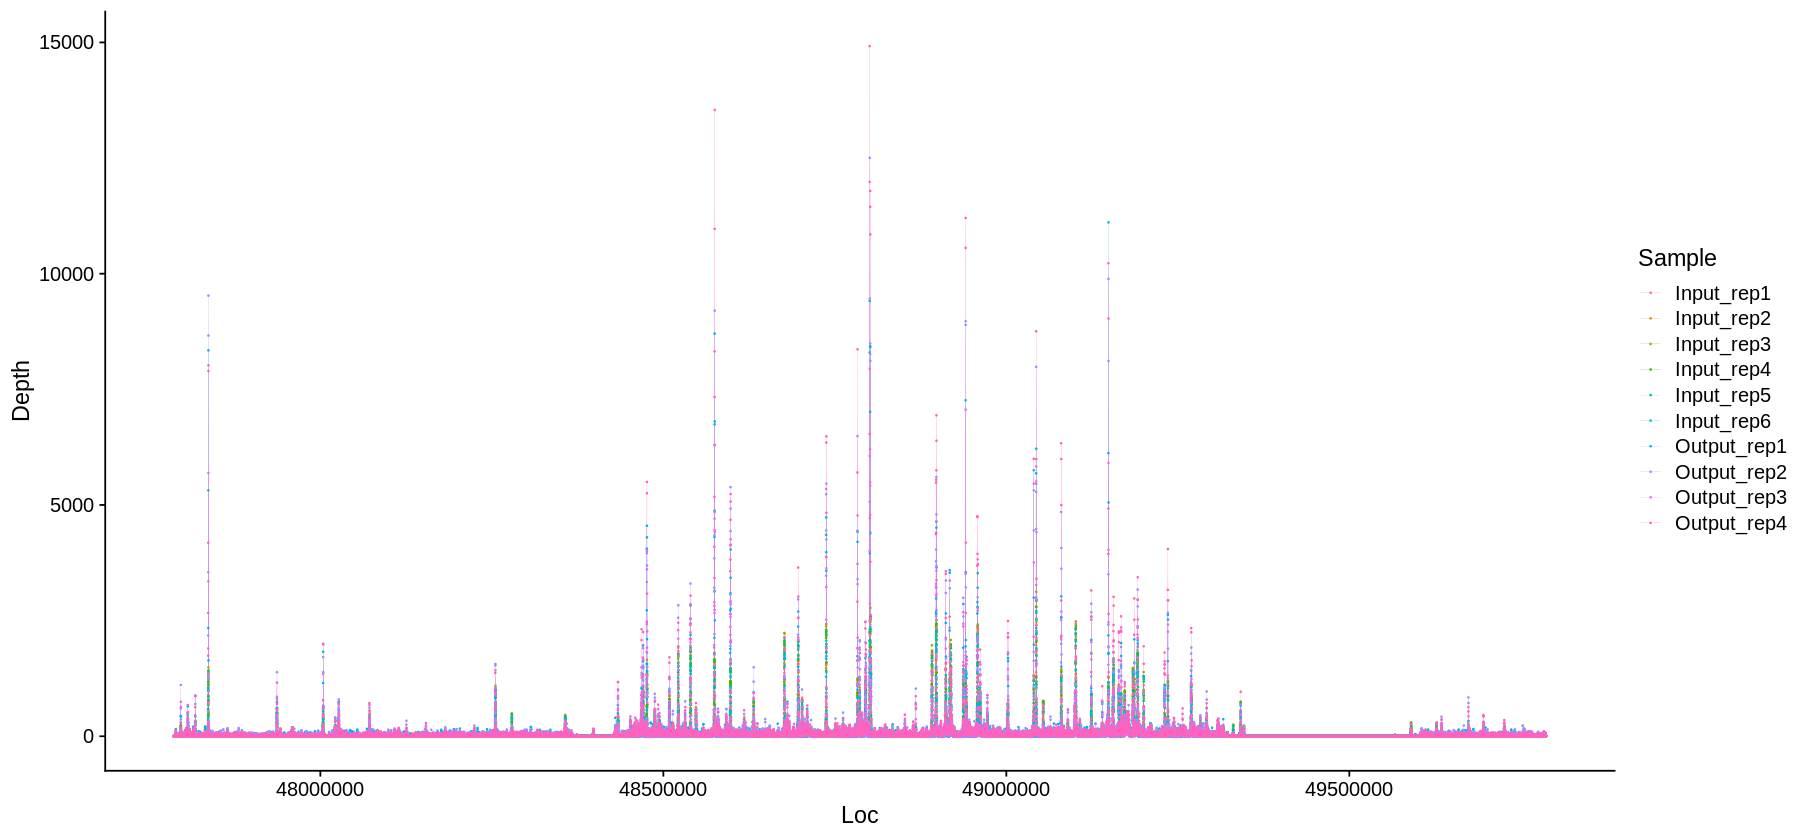

In [13]:
options(repr.plot.width=15, repr.plot.heigth=4)
print(gpt)

In [8]:
fdiry  = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")
fname  = "KS91_K562_hg38_ASTARRseq_Output_rep4.GATA1.unstranded.perbase.tsv.gz"
fpath  = file.path(fdiry, fname)

ctypes = c(col_character(), col_integer(), col_integer())
cnames = c("Chrom", "Loc", "Depth")
dat    = read_tsv(fpath, col_types = ctypes, col_names = cnames)
head(dat)

Chrom,Loc,Depth
<chr>,<dbl>,<dbl>
chrX,47786400,0
chrX,47786401,0
chrX,47786402,0
chrX,47786403,0
chrX,47786404,0
chrX,47786405,0


In [9]:
gpt = ggplot(dat, aes(x=Loc, y=Depth)) + geom_point() + theme_cowplot()

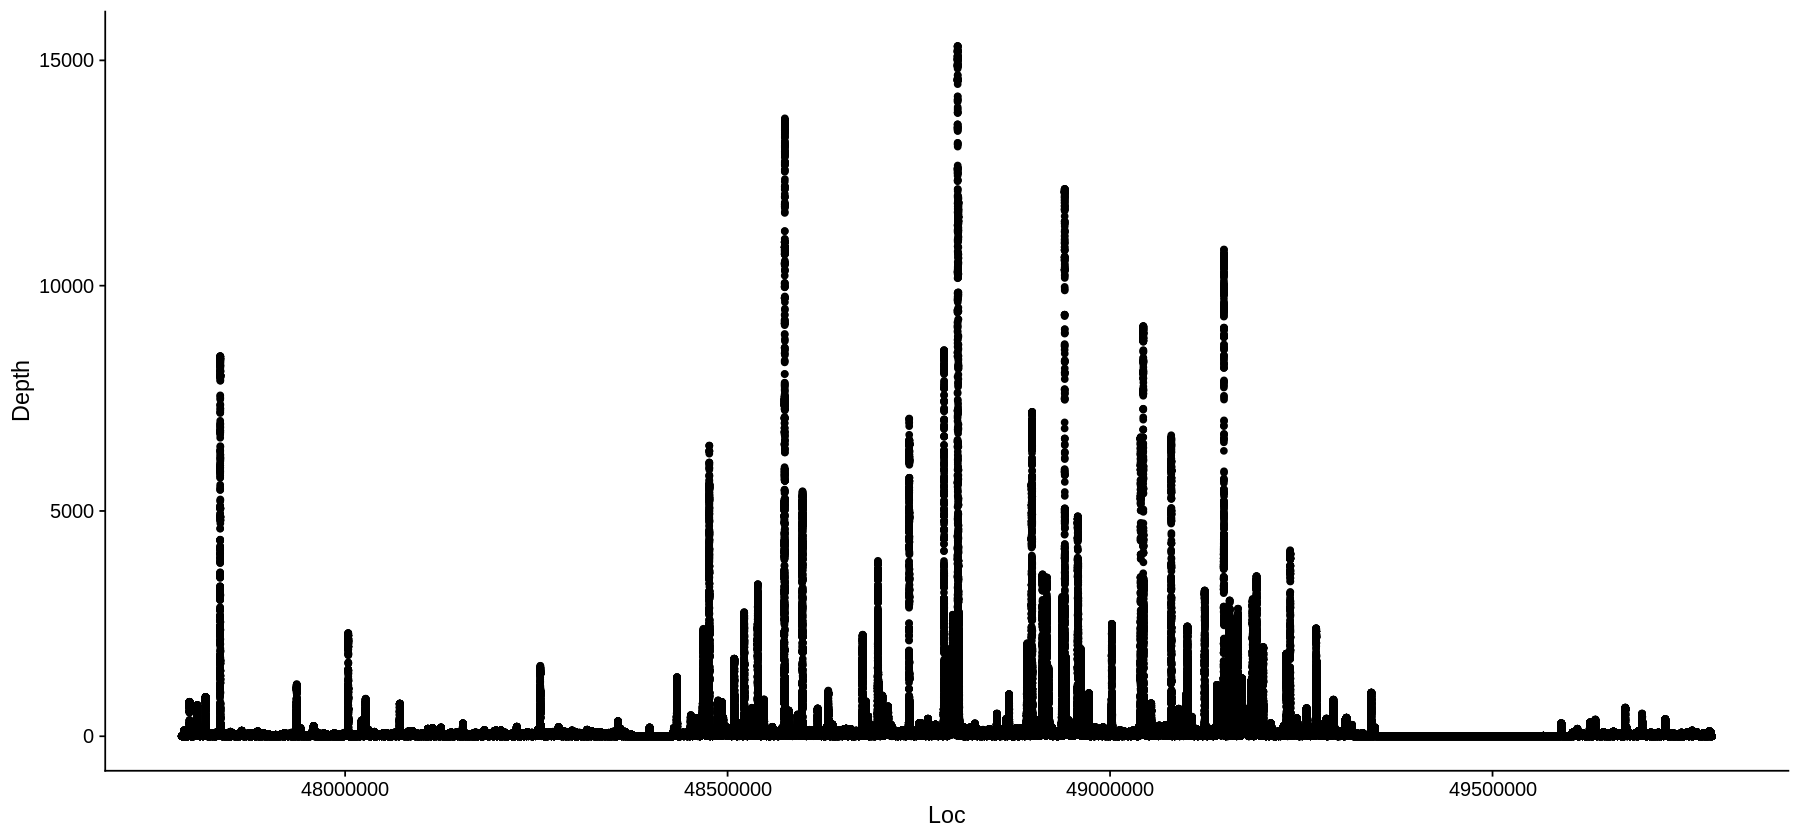

In [13]:
options(repr.plot.width=15, repr.plot.heigth=4)
print(gpt)

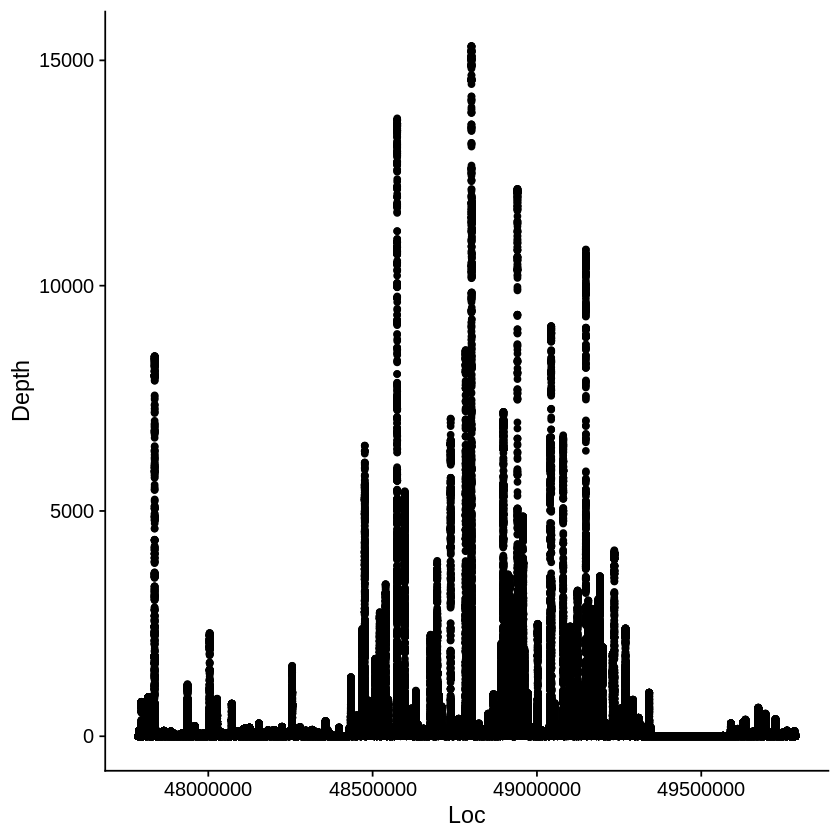

In [10]:
print(gpt)